In [1]:
import pandas as pd
df=pd.read_csv("c:/data/pima/data.csv")
df

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.columns

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'Diabetes_Pedigree_Function', 'age', 'outcome'],
      dtype='object')

In [3]:
X=df[['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
'bmi', 'Diabetes_Pedigree_Function', 'age']]
y=df['outcome']

In [4]:
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gs=GridSearchCV(DecisionTreeClassifier(random_state=42),
param_grid={'min_samples_split':range(2,403,10)},
scoring=scoring, refit='AUC', return_train_score=True)
gs.fit(X,y)
results=gs.cv_results_
results

{'mean_fit_time': array([0.00512419, 0.00314226, 0.00331817, 0.00289316, 0.00410957,
        0.00432706, 0.00323577, 0.00273194, 0.00365853, 0.00324459,
        0.0031918 , 0.002598  , 0.00215616, 0.00218821, 0.00221581,
        0.00261426, 0.00238776, 0.00243249, 0.00199075, 0.00277395,
        0.00221786, 0.0017837 , 0.002213  , 0.00235515, 0.0019177 ,
        0.00254183, 0.00181656, 0.00218463, 0.00213246, 0.00202594,
        0.00271964, 0.00199943, 0.00273619, 0.00242181, 0.00210495,
        0.00170212, 0.00340724, 0.00180063, 0.00278363, 0.00201125,
        0.00193696]),
 'std_fit_time': array([1.30222100e-03, 2.43198198e-04, 8.98026467e-04, 7.06457872e-04,
        1.15989857e-03, 1.61788851e-03, 3.83817641e-04, 6.37724547e-04,
        9.63732205e-04, 9.70170149e-04, 1.06278034e-03, 4.88391818e-04,
        3.85683792e-04, 3.91158243e-04, 3.93405463e-04, 5.03784449e-04,
        5.05049725e-04, 7.86006468e-04, 5.18443708e-05, 4.93243118e-04,
        3.97010752e-04, 3.94243460e-04, 2

In [5]:
print(results['mean_test_AUC'])
print(results['mean_test_Accuracy'])

[0.68427324 0.73324354 0.76396296 0.77676834 0.78944235 0.78680154
 0.79156883 0.79634172 0.79734556 0.80109574 0.79870755 0.79870755
 0.79754088 0.7982673  0.80199301 0.79594444 0.78316667 0.77030294
 0.76592558 0.76592558 0.76592558 0.76117365 0.75559713 0.75400594
 0.75400594 0.74200035 0.74200035 0.74200035 0.7377362  0.7377362
 0.7377362  0.7377362  0.7377362  0.7377362  0.73290287 0.73290287
 0.73290287 0.73290287 0.73290287 0.70984207 0.70984207]
[0.71630592 0.72409812 0.71751974 0.7188439  0.73185638 0.73056617
 0.73966556 0.74358713 0.73967405 0.74618453 0.73966556 0.73966556
 0.73966556 0.74096426 0.73312962 0.73705118 0.73575248 0.74484339
 0.74092182 0.74092182 0.74092182 0.73311264 0.73181394 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152
 0.72273152 0.72273152 0.72273152 0.72273152 0.72273152]


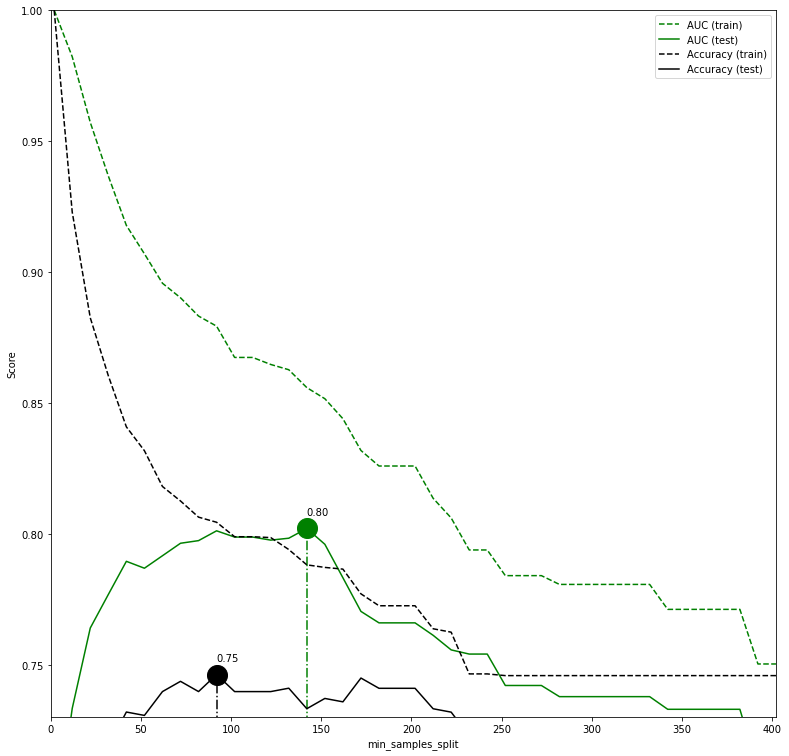

In [9]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(13,13))
plt.xlabel("min_samples_split")
plt.ylabel("Score")
ax=plt.gca()
ax.set_xlim(0,402)
ax.set_ylim(0.73,1)

X_axis=np.array(results['param_min_samples_split'].data,dtype=float)
for scorer, color in zip(sorted(scoring),['g','k']):
    for sample,style in (('train','--'),('test','-')):
        sample_score_mean=results['mean_%s_%s' %(sample,scorer)]
        ax.plot(X_axis, sample_score_mean, style, color=color,label="%s (%s)"%(scorer, sample))
    best_index=np.argmax(results['mean_test_%s'% scorer])
    best_score=results['mean_test_%s' % scorer][best_index]
    ax.plot([X_axis[best_index],]*2,[0,best_score],linestyle='-.',color=color,marker='o',ms=20)
    ax.annotate("%0.2f" % best_score,(X_axis[best_index],best_score+0.005))

plt.legend()
plt.grid(False)
plt.show()